<h4> 
Varsha Naik
    
    
Yashada Nikam 
    
Tanaya Patole
    
Ahbaz Memon
    
Snehalraj Chugh

</h4>

</h4>
Analysis and prediction of factors influencing the mental health of IT professionals using machine learning methods
    
</h4>    

<h1><font color='green'>this font is for main task</font></h1>
<h3><font color='red'>this font is for function</font></h3>
<h4><font color='orange'>this font is for main columns</font></h3>
<h4>comment</h4>

<h1><font color='green'>Essential Library</font></h1>

In [1]:
import time
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as se

<h1><font color='green'>Lets add style to our plots</font></h1>

In [2]:
plt.style.use('fivethirtyeight')

<h1><font color='green'>Loading Data...</font></h1>

In [3]:
data = pd.read_csv('01.Mental Health.csv')

In [4]:
data

,Are you self-employed?,How many employees does your company or organization have?,Is your employer primarily a tech company/organization?,Is your primary role within your company related to tech/IT?,Does your employer provide mental health benefits as part of healthcare coverage?,Do you know the options for mental health care available under your employer-provided coverage?,"Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?",Does your employer offer resources to learn more about mental health concerns and options for seeking help?,Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?,"If a mental health issue prompted you to request a medical leave from work, asking for that leave would be:",...,"If you have a mental health issue, do you feel that it interferes with your work when being treated effectively?","If you have a mental health issue, do you feel that it interferes with your work when NOT being treated effectively?",What is your age?,What is your gender?,What country do you live in?,What US state or territory do you live in?,What country do you work in?,What US state or territory do you work in?,Which of the following best describes your work position?,Do you work remotely?
0,0,26-100,1.0,NaN,Not eligible for coverage / N/A,NaN,No,No,I don't know,Very easy,...,Not applicable to me,Not applicable to me,39,Male,United Kingdom,NaN,United Kingdom,NaN,Back-end Developer,Sometimes
1,0,6-25,1.0,NaN,No,Yes,Yes,Yes,Yes,Somewhat easy,...,Rarely,Sometimes,29,male,United States of America,Illinois,United States of America,Illinois,Back-end Developer|Front-end Developer,Never
2,0,6-25,1.0,NaN,No,NaN,No,No,I don't know,Neither easy nor difficult,...,Not applicable to me,Not applicable to me,38,Male,United Kingdom,NaN,United Kingdom,NaN,Back-end Developer,Always
3,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Sometimes,Sometimes,43,male,United Kingdom,NaN,United Kingdom,NaN,Supervisor/Team Lead,Sometimes
4,0,6-25,0.0,1.0,Yes,Yes,No,No,No,Neither easy nor difficult,...,Sometimes,Sometimes,43,Female,United States of America,Illinois,United States of America,Illinois,Executive Leadership|Supervisor/Team Lead|Dev ...,Sometimes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1428,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Not applicable to me,Not applicable to me,34,Female,United States of America,New York,United States of America,New York,Other,Sometimes
1429,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Sometimes,Often,56,MALE,United States of America,California,Afghanistan,NaN,Support,Sometimes
1430,0,100-500,1.0,NaN,Yes,Yes,Yes,Yes,I don't know,Somewhat difficult,...,Rarely,Sometimes,52,Male,United States of America,Georgia,United States of America,Georgia,Back-end Developer,Sometimes
1431,0,100-500,0.0,1.0,I don't know,I am not sure,No,Yes,I don't know,Somewhat difficult,...,Sometimes,Often,30,Female,United States of America,Nebraska,United States of America,Nebraska,DevOps/SysAdmin,Sometimes


In [5]:
data.columns

Index(['Are you self-employed?',
       'How many employees does your company or organization have?',
       'Is your employer primarily a tech company/organization?',
       'Is your primary role within your company related to tech/IT?',
       'Does your employer provide mental health benefits as part of healthcare coverage?',
       'Do you know the options for mental health care available under your employer-provided coverage?',
       'Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?',
       'Does your employer offer resources to learn more about mental health concerns and options for seeking help?',
       'Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?',
       'If a mental health issue prompted you to request a medical leave from work, asking for that leave would be:',
       'Do you think that dis

<h1><font color='green'>Column's name replacement</font></h1>

<h4>its very hard to work with this kind of colums lets replaced it with some good names</h4>

In [6]:
renamed_columns = ['self_empl_flag', 'comp_no_empl', 'tech_comp_flag', 'tech_role_flag', 'mh_coverage_flag',
                  'mh_coverage_awareness_flag', 'mh_employer_discussion', 'mh_resources_provided', 'mh_anonimity_flag',
                  'mh_medical_leave', 'mh_discussion_neg_impact', 'ph_discussion_neg_impact', 'mh_discussion_cowork',
                  'mh_discussion_supervis', 'mh_eq_ph_employer', 'mh_conseq_coworkers', 'mh_coverage_flag2', 'mh_online_res_flag',
                  'mh_diagnosed&reveal_clients_flag', 'mh_diagnosed&reveal_clients_impact', 'mh_diagnosed&reveal_cowork_flag', 'mh_cowork_reveal_neg_impact',
                  'mh_prod_impact', 'mh_prod_impact_perc', 'prev_employers_flag', 'prev_mh_benefits', 'prev_mh_benefits_awareness',
                  'prev_mh_discussion', 'prev_mh_resources', 'prev_mh_anonimity', 'prev_mh_discuss_neg_conseq', 'prev_ph_discuss_neg_conseq',
                  'prev_mh_discussion_cowork', 'prev_mh_discussion_supervisor', 'prev_mh_importance_employer', 'prev_mh_conseq_coworkers',
                  'future_ph_specification', 'why/why_not', 'future_mh_specification', 'why/why_not2', 'mh_hurt_on_career', 'mh_neg_view_cowork',
                  'mh_sharing_friends/fam_flag', 'mh_bad_response_workplace', 'mh_for_others_bad_response_workplace', 'mh_family_hist',
                  'mh_disorder_past', 'mh_disorder_current', 'yes:what_diagnosis?', 'maybe:whats_your_diag', 'mh_diagnos_proffesional',
                  'yes:condition_diagnosed', 'mh_sought_proffes_treatm', 'mh_eff_treat_impact_on_work', 'mh_not_eff_treat_impact_on_work',
                  'age', 'sex', 'country_live', 'live_us_teritory', 'country_work', 'work_us_teritory', 'work_position', 'remote_flag']

In [7]:
data.columns = renamed_columns

In [8]:
data.shape

(1433, 63)

<h4>Lets look at null values with respect to columns</h4>

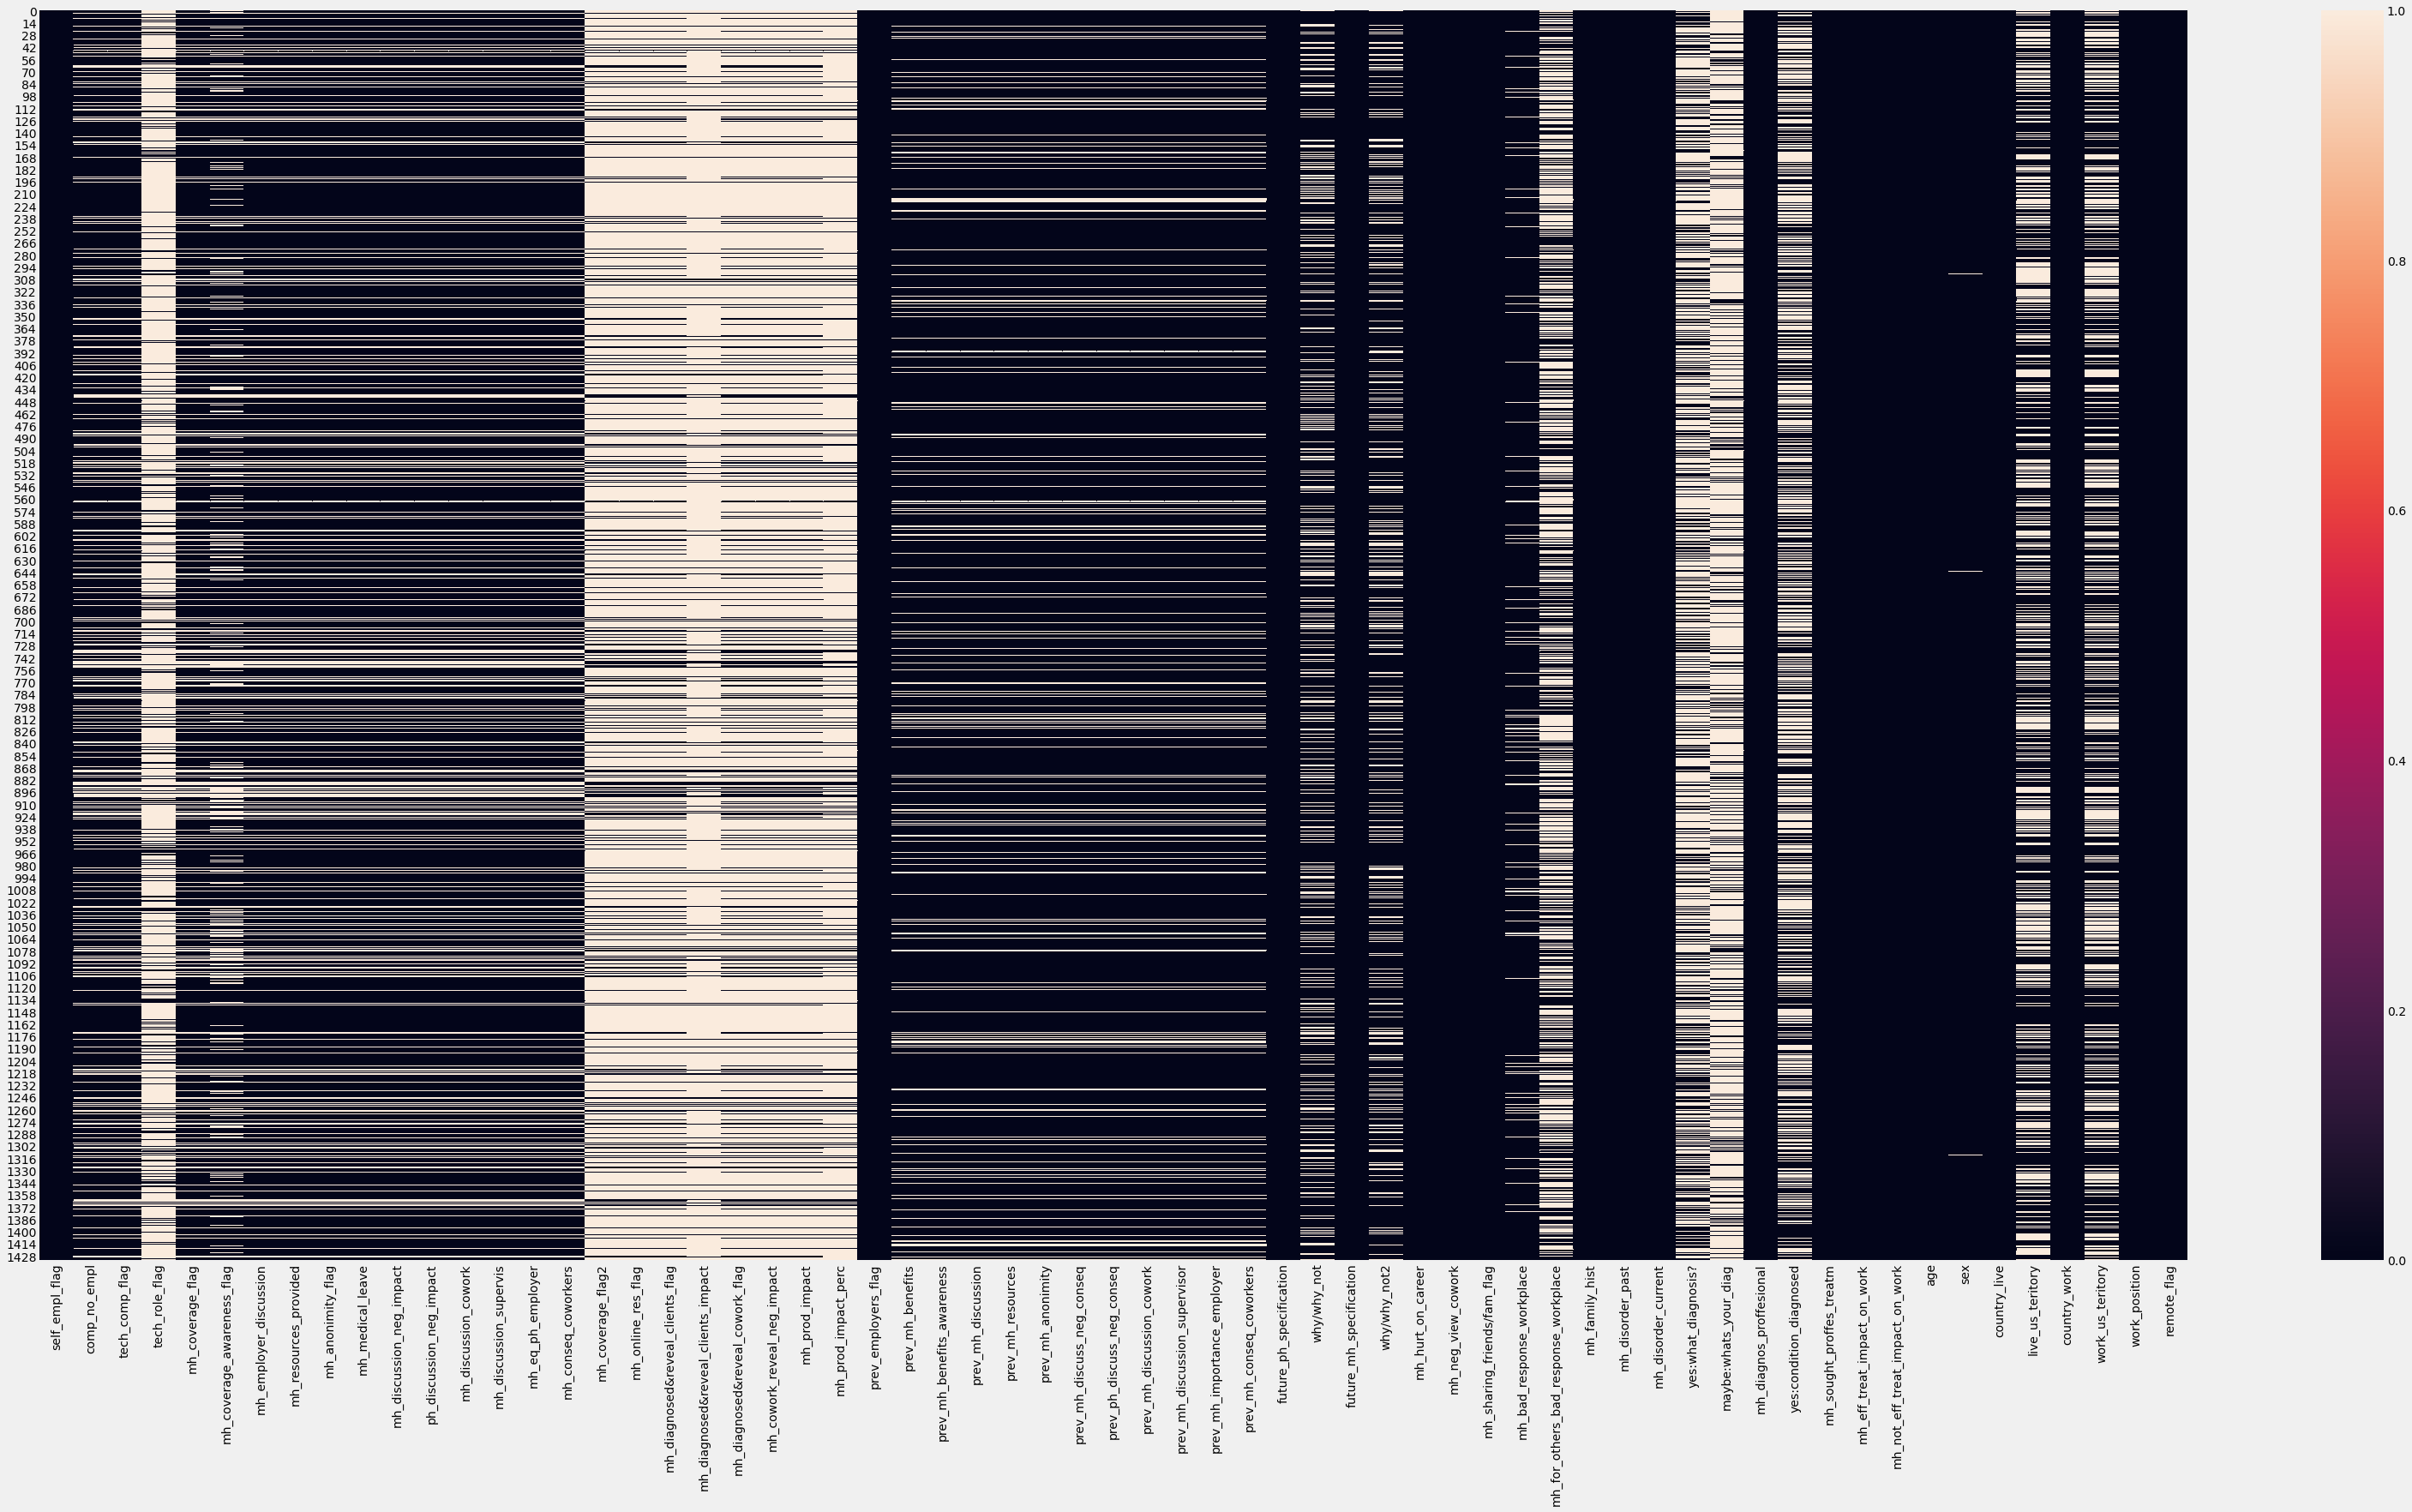

In [9]:
plt.figure(figsize = (50,25))
se.heatmap(data.isnull())

In [10]:
temp1 = data.isnull().sum()
temp1

self_empl_flag         0
comp_no_empl         287
tech_comp_flag       287
tech_role_flag      1170
mh_coverage_flag     287
                    ... 
live_us_teritory     593
country_work           0
work_us_teritory     582
work_position          0
remote_flag            0
Length: 63, dtype: int64

<h4>its seems like our data set has null values lets visualize it</h4>

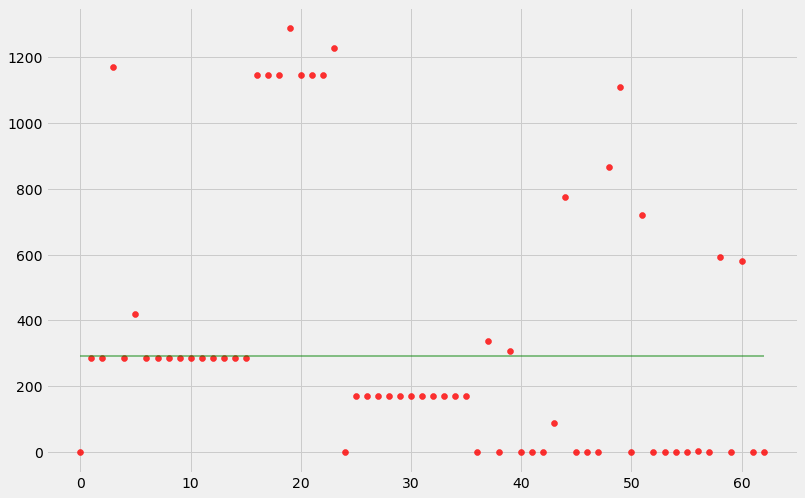

In [11]:
plt.figure(figsize = (12,8))
plt.plot(range(len(temp1.values)),[292]*len(temp1.values), alpha = 0.5, linewidth = 1.8, color = 'green')
plt.scatter(range(len(temp1.values)),temp1.values,alpha = 0.8,color = 'red')

<h4>points above green line shows the null entry more than 287 entries are null which is lot...</h4>

<h1><font color='green'>lets get rid off some giant number of null entries</font></h1>

In [12]:
for c in range(len(temp1.values)):
    if temp1.values[c] > 292:
        print(renamed_columns[c])
        data.drop(axis = 1,columns = [renamed_columns[c]],inplace = True)

tech_role_flag
mh_coverage_awareness_flag
mh_coverage_flag2
mh_online_res_flag
mh_diagnosed&reveal_clients_flag
mh_diagnosed&reveal_clients_impact
mh_diagnosed&reveal_cowork_flag
mh_cowork_reveal_neg_impact
mh_prod_impact
mh_prod_impact_perc
why/why_not
why/why_not2
mh_for_others_bad_response_workplace
yes:what_diagnosis?
maybe:whats_your_diag
yes:condition_diagnosed
live_us_teritory
work_us_teritory


<h4>so in above code we just drop respective columns which has more than 292 null entries lets visualize it again</h4>

In [13]:
temp1 = data.isnull().sum()
temp1

self_empl_flag                       0
comp_no_empl                       287
tech_comp_flag                     287
mh_coverage_flag                   287
mh_employer_discussion             287
mh_resources_provided              287
mh_anonimity_flag                  287
mh_medical_leave                   287
mh_discussion_neg_impact           287
ph_discussion_neg_impact           287
mh_discussion_cowork               287
mh_discussion_supervis             287
mh_eq_ph_employer                  287
mh_conseq_coworkers                287
prev_employers_flag                  0
prev_mh_benefits                   169
prev_mh_benefits_awareness         169
prev_mh_discussion                 169
prev_mh_resources                  169
prev_mh_anonimity                  169
prev_mh_discuss_neg_conseq         169
prev_ph_discuss_neg_conseq         169
prev_mh_discussion_cowork          169
prev_mh_discussion_supervisor      169
prev_mh_importance_employer        169
prev_mh_conseq_coworkers 

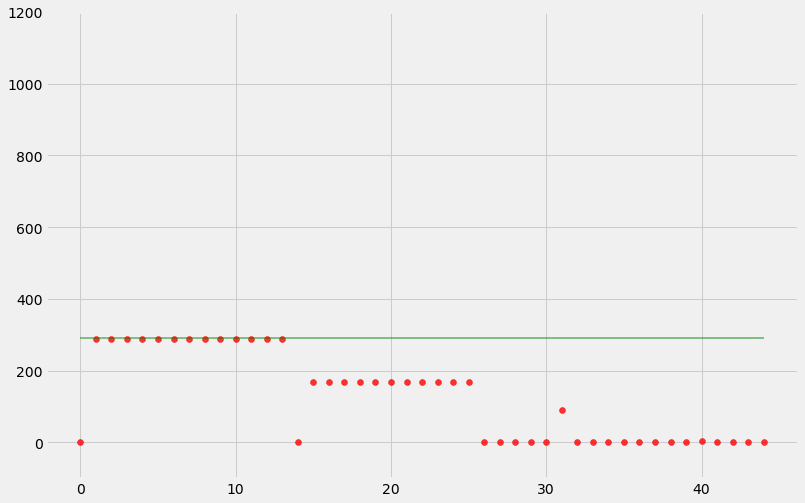

In [14]:
plt.figure(figsize = (12,8))
plt.ylim((-100,1200))
plt.plot(range(len(temp1.values)),[292]*len(temp1.values), alpha = 0.5, linewidth = 1.8, color = 'green')
plt.scatter(range(len(temp1.values)),temp1.values,alpha = 0.8,color = 'red')

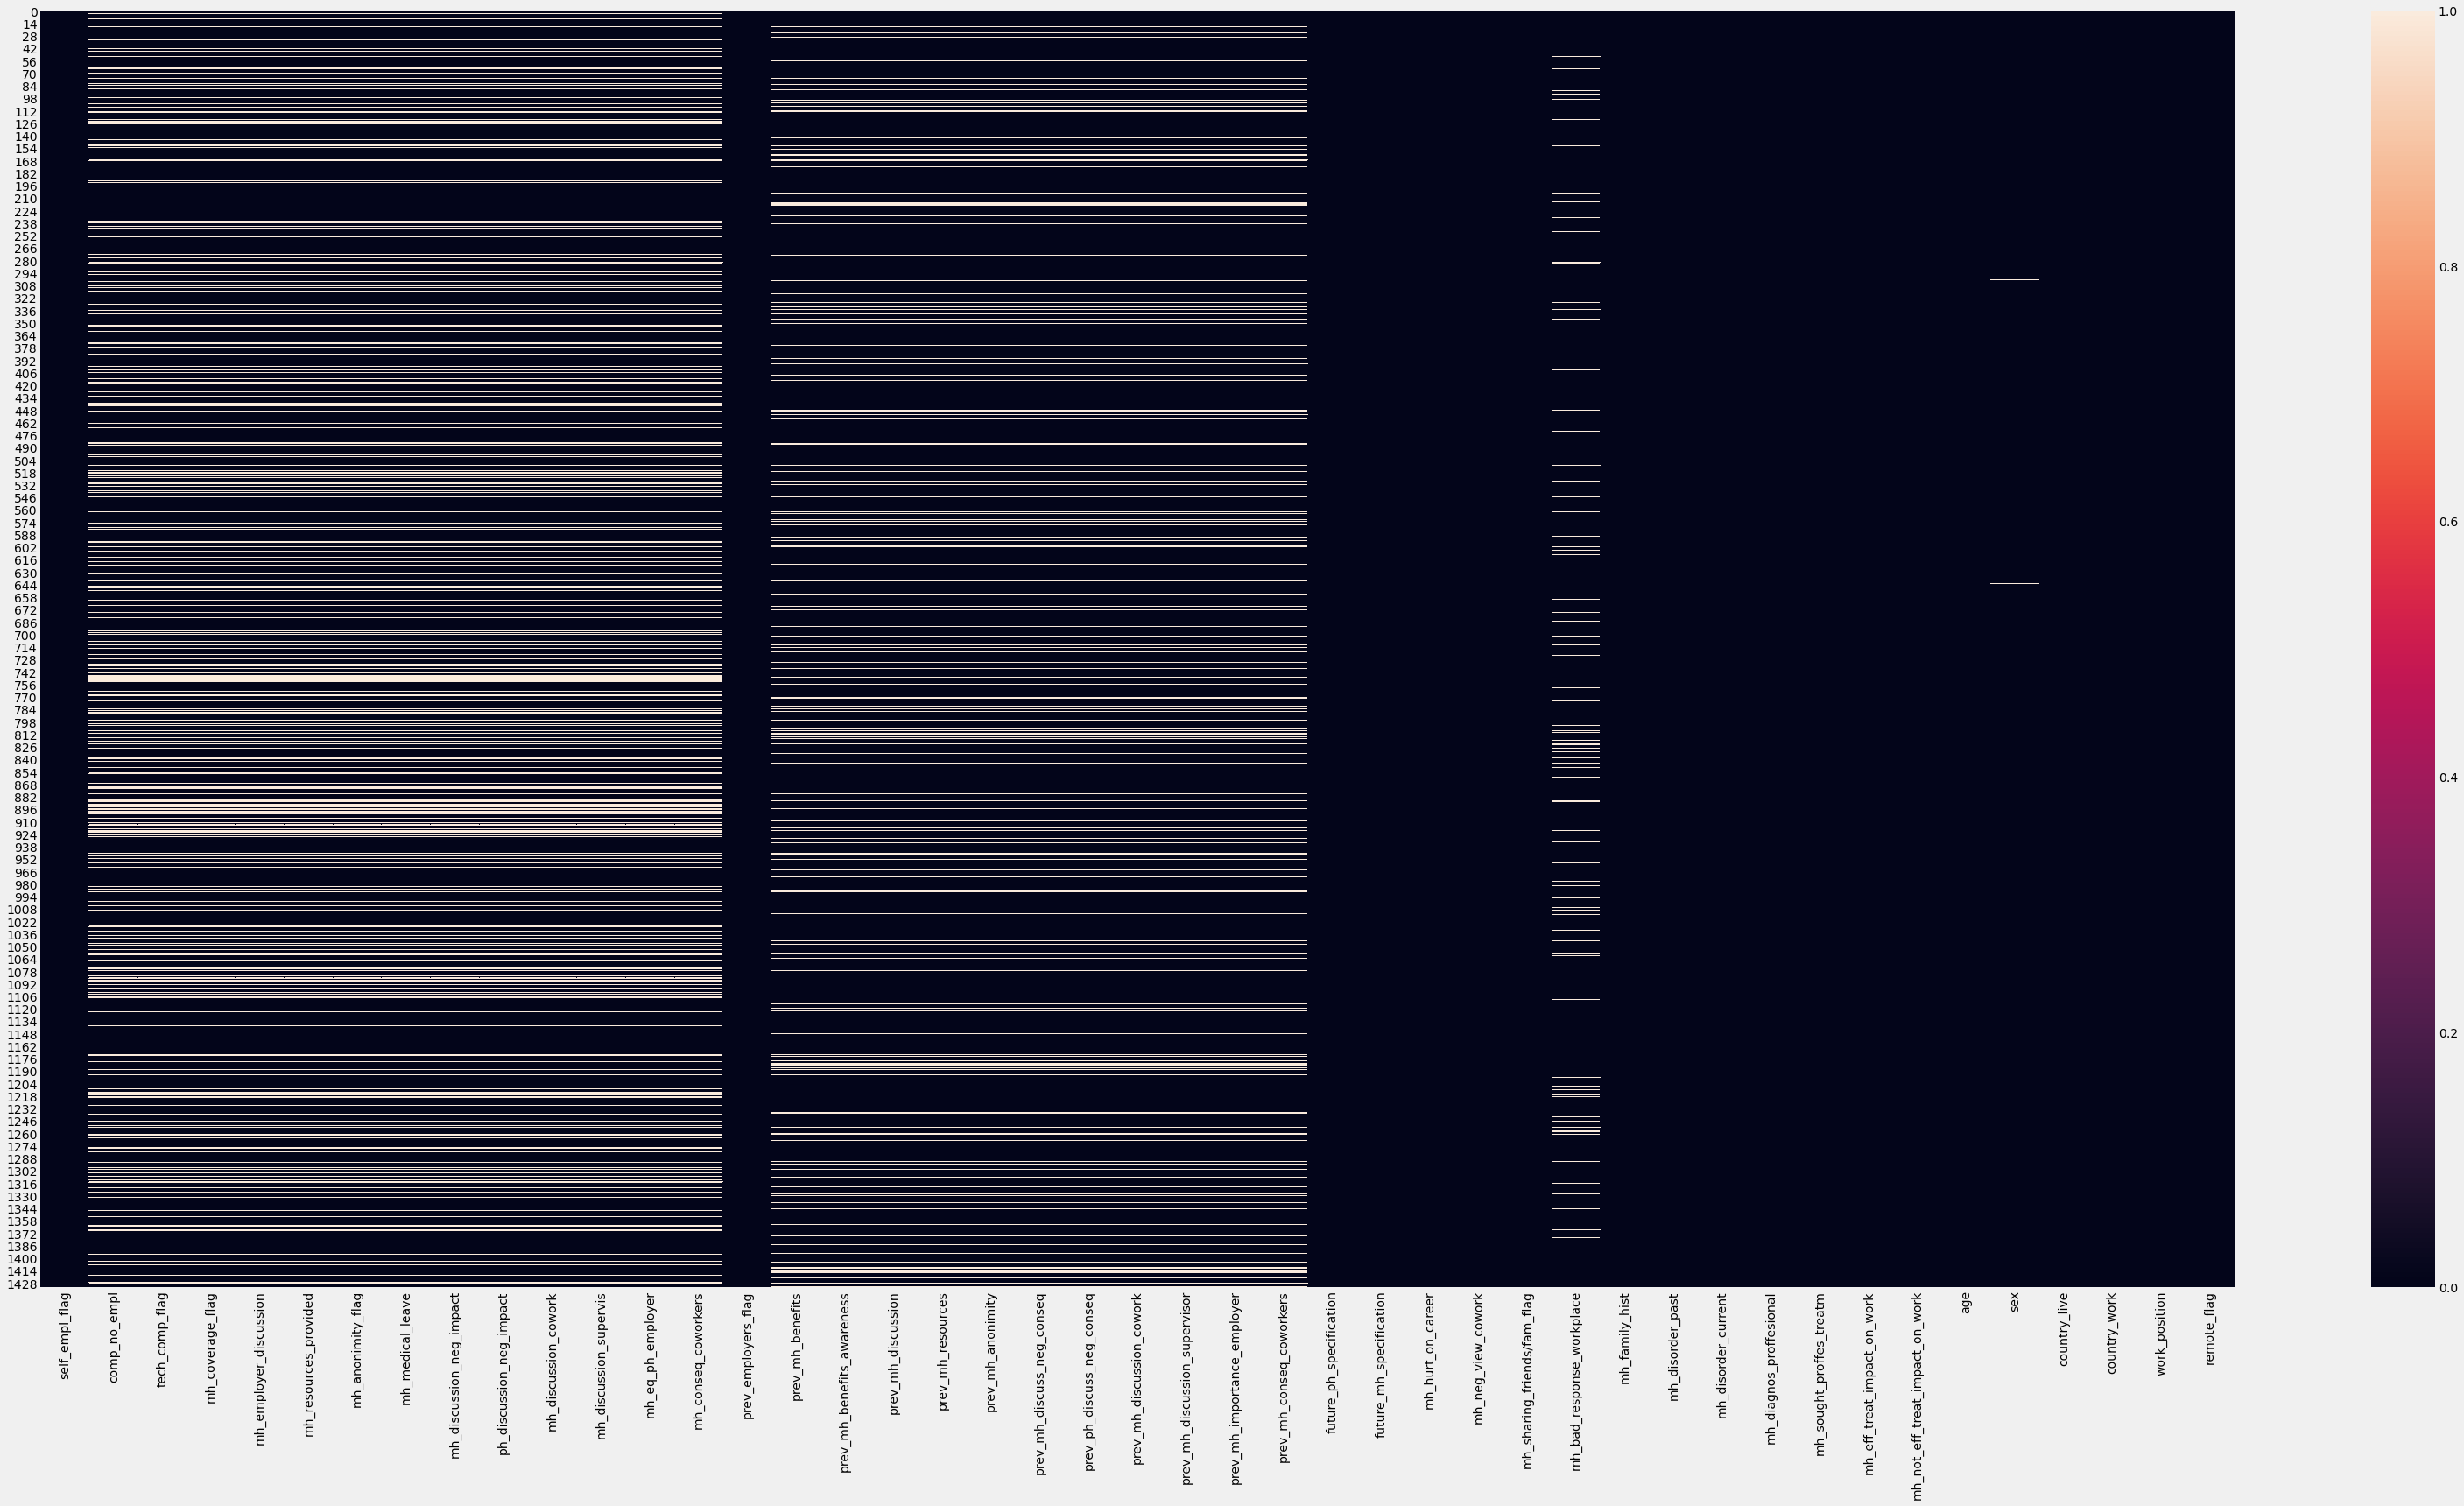

In [15]:
plt.figure(figsize = (50,25))
se.heatmap(data.isnull())

<h1><font color='green'>Now lets look some replacement for data in terms of duplication, </font></h1>

<h3><font color='brown'>function for printing the unique values</h3>

In [16]:
def unique_values_in_columns(df):
    for c in df.columns:
        print(c,':',df[c].unique())

<h3><font color='brown'>function for printing the unique object values</h3>

In [17]:
def unique_object_values_in_columns(df):
    for c in df.columns:
        if df[c].dtypes == 'object':
            print(c,':',df[c].unique())

<h4>lets look unique value in column</h4>

In [18]:
unique_values_in_columns(data)

self_empl_flag : [0 1]
comp_no_empl : ['26-100' '6-25' nan 'More than 1000' '100-500' '500-1000' '1-5']
tech_comp_flag : [ 1. nan  0.]
mh_coverage_flag : ['Not eligible for coverage / N/A' 'No' nan 'Yes' "I don't know"]
mh_employer_discussion : ['No' 'Yes' nan "I don't know"]
mh_resources_provided : ['No' 'Yes' nan "I don't know"]
mh_anonimity_flag : ["I don't know" 'Yes' nan 'No']
mh_medical_leave : ['Very easy' 'Somewhat easy' 'Neither easy nor difficult' nan
 'Very difficult' 'Somewhat difficult' "I don't know"]
mh_discussion_neg_impact : ['No' 'Maybe' nan 'Yes']
ph_discussion_neg_impact : ['No' nan 'Maybe' 'Yes']
mh_discussion_cowork : ['Maybe' nan 'Yes' 'No']
mh_discussion_supervis : ['Yes' 'Maybe' nan 'No']
mh_eq_ph_employer : ["I don't know" 'Yes' nan 'No']
mh_conseq_coworkers : ['No' nan 'Yes']
prev_employers_flag : [1 0]
prev_mh_benefits : ['No, none did' 'Yes, they all did' 'Some did' "I don't know" nan]
prev_mh_benefits_awareness : ['N/A (not currently aware)' 'I was aware o

<h3><font color='orange'>on comp_no_empl column</font></h3>

<h4>lets replace no of employees by convincing numbers</h4>

In [19]:
data['comp_no_empl'] = data['comp_no_empl'].replace('1-5', 5)
data['comp_no_empl'] = data['comp_no_empl'].replace('6-25',25)
data['comp_no_empl'] = data['comp_no_empl'].replace('26-100', 100)
data['comp_no_empl'] = data['comp_no_empl'].replace('100-500',500)
data['comp_no_empl'] = data['comp_no_empl'].replace('500-1000',1000)
data['comp_no_empl'] = data['comp_no_empl'].replace('More than 1000',5000)

<h4>lets visualize the freq of our new class allocated to comp_no_empl</h4>

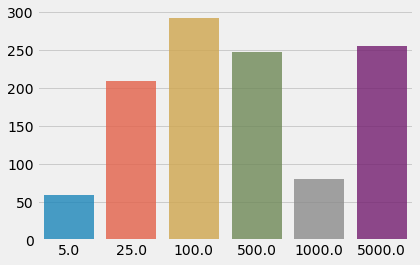

In [20]:
se.barplot(x=data['comp_no_empl'].value_counts().index,y = data['comp_no_empl'].value_counts().values,alpha=0.8)

<font color = 'orange'><h3>on Gender column</h3></font>

<h4>lets replace genders by grouping the genders into 3 categories: Female, Male, Genderqueer/Other</h4>

In [21]:
data['sex'] = data['sex'].replace([
    'male', 'Male ', 'M', 'm', 'man', 'Cis male',
    'Male.', 'Male (cis)', 'Man', 'Sex is male',
    'cis male', 'Malr', 'Dude', "I'm a man why didn't you make this a drop down question. You should of asked sex? And I would of answered yes please. Seriously how much text can this take? ",
    'mail', 'M|', 'male ', 'Cis Male', 'Male (trans, FtM)',
    'cisdude', 'cis man', 'MALE'], 'Male')

data['sex'] = data['sex'].replace([
    'female', 'I identify as female.', 'female ',
    'Female assigned at birth ', 'F', 'Woman', 'fm', 'f',
    'Cis female', 'Transitioned, M2F', 'Female or Multi-Gender Femme',
    'Female ', 'woman', 'female/woman', 'Cisgender Female', 
    'mtf', 'fem', 'Female (props for making this a freeform field, though)',
    ' Female', 'Cis-woman', 'AFAB', 'Transgender woman',
    'Cis female '], 'Female')

data['sex'] = data['sex'].replace([
    'Bigender', 'non-binary,', 'Genderfluid (born female)',
    'Other/Transfeminine', 'Androgynous', 'male 9:1 female, roughly',
    'nb masculine', 'genderqueer', 'Human', 'Genderfluid',
    'Enby', 'genderqueer woman', 'Queer', 'Agender', 'Fluid',
    'Genderflux demi-girl', 'female-bodied; no feelings about gender',
    'non-binary', 'Male/genderqueer', 'Nonbinary', 'Other', 'none of your business',
    'Unicorn', 'human', 'Genderqueer'], 'Genderqueer/Other')

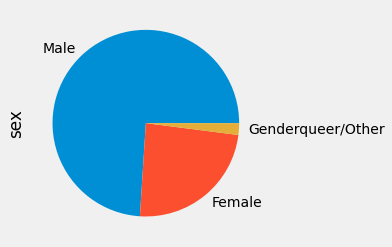

In [22]:
data.sex.value_counts().plot.pie()

<h1><font color='green'>its look like there are some replacement lets do it</font></h1>

<h3><font color='orange'>to many columns</font></h3> 

<h4>for class 0<h4>

In [23]:
data.replace(to_replace = ['No','Very easy','No, none did','N/A (not currently aware)','No, I only became aware later','None did','None of them','No, at none of my previous employers',"No, I don't think it would",'Neutral','Never','Rarely','Female','No, it has not','Not eligible for coverage / N/A','No, they do not',"No, I don't think they would",], value = 0, inplace= True)

<h4>for class 1<h4>

In [24]:
data.replace(to_replace = ['Yes','Somewhat easy','Yes, they all did','I was aware of some','Yes, I was aware of all of them','Yes, always','Yes, all of them','Yes, at all of my previous employers','Yes, I think it would','Yes, it has','Yes, they do','Yes, I think they would','Somewhat open','Yes, I experienced','Often','Male','Always','Yes, I observed'], value = 1, inplace= True)

<h4>for class 2<h4>

In [25]:
data.replace(to_replace = ["I don't know",'I am not sure','Neither easy nor difficult','Maybe','Very open','Maybe/Not sure','Genderqueer/Other'], value = 2, inplace= True)

<h4>for class 3<h4>

In [26]:
data.replace(to_replace = ['Sometimes','Some did','Some of them','Some of my previous employers',], value = 3, inplace= True)

<h4>for class 4<h4>

In [27]:
data.replace(to_replace = ['Not applicable to me (I do not have a mental illness)','Not applicable to me',], value = 4, inplace= True)

<h4>for class -1<h4>

In [28]:
data.replace(to_replace =['Very difficult','Somewhat not open',], value = -1, inplace= True)

<h4>for class -2<h4>

In [29]:
data.replace(to_replace =['Not open at all','Somewhat difficult'], value = -2, inplace= True)

<h4>Now lets check how some replacement look</h4>

In [30]:
unique_values_in_columns(data)

self_empl_flag : [0 1]
comp_no_empl : [ 100.   25.   nan 5000.  500. 1000.    5.]
tech_comp_flag : [ 1. nan  0.]
mh_coverage_flag : [ 0. nan  1.  2.]
mh_employer_discussion : [ 0.  1. nan  2.]
mh_resources_provided : [ 0.  1. nan  2.]
mh_anonimity_flag : [ 2.  1. nan  0.]
mh_medical_leave : [ 0.  1.  2. nan -1. -2.]
mh_discussion_neg_impact : [ 0.  2. nan  1.]
ph_discussion_neg_impact : [ 0. nan  2.  1.]
mh_discussion_cowork : [ 2. nan  1.  0.]
mh_discussion_supervis : [ 1.  2. nan  0.]
mh_eq_ph_employer : [ 2.  1. nan  0.]
mh_conseq_coworkers : [ 0. nan  1.]
prev_employers_flag : [1 0]
prev_mh_benefits : [ 0.  1.  3.  2. nan]
prev_mh_benefits_awareness : [ 0.  1. nan]
prev_mh_discussion : [ 2.  0.  3. nan  1.]
prev_mh_resources : [ 0.  3. nan  1.]
prev_mh_anonimity : [ 2.  1.  3.  0. nan]
prev_mh_discuss_neg_conseq : [ 3.  0.  2.  1. nan]
prev_ph_discuss_neg_conseq : [ 0.  3.  1. nan]
prev_mh_discussion_cowork : [ 3.  0.  1. nan]
prev_mh_discussion_supervisor : [ 3.  2.  0.  1. nan]
p

<h3><font color='orange'>on age column</font></h3> 

In [31]:
data['age'].value_counts()

30     94
31     82
29     79
28     74
35     74
32     72
33     69
34     69
26     64
27     63
37     59
39     55
38     54
36     50
25     44
24     42
40     36
22     32
44     31
43     30
42     29
45     27
23     24
41     24
46     22
21     15
47     14
49     13
55     12
50      9
48      9
54      7
52      7
51      7
20      6
56      5
63      4
57      4
19      4
53      3
61      2
59      2
66      1
74      1
65      1
15      1
17      1
3       1
58      1
62      1
323     1
99      1
70      1
Name: age, dtype: int64

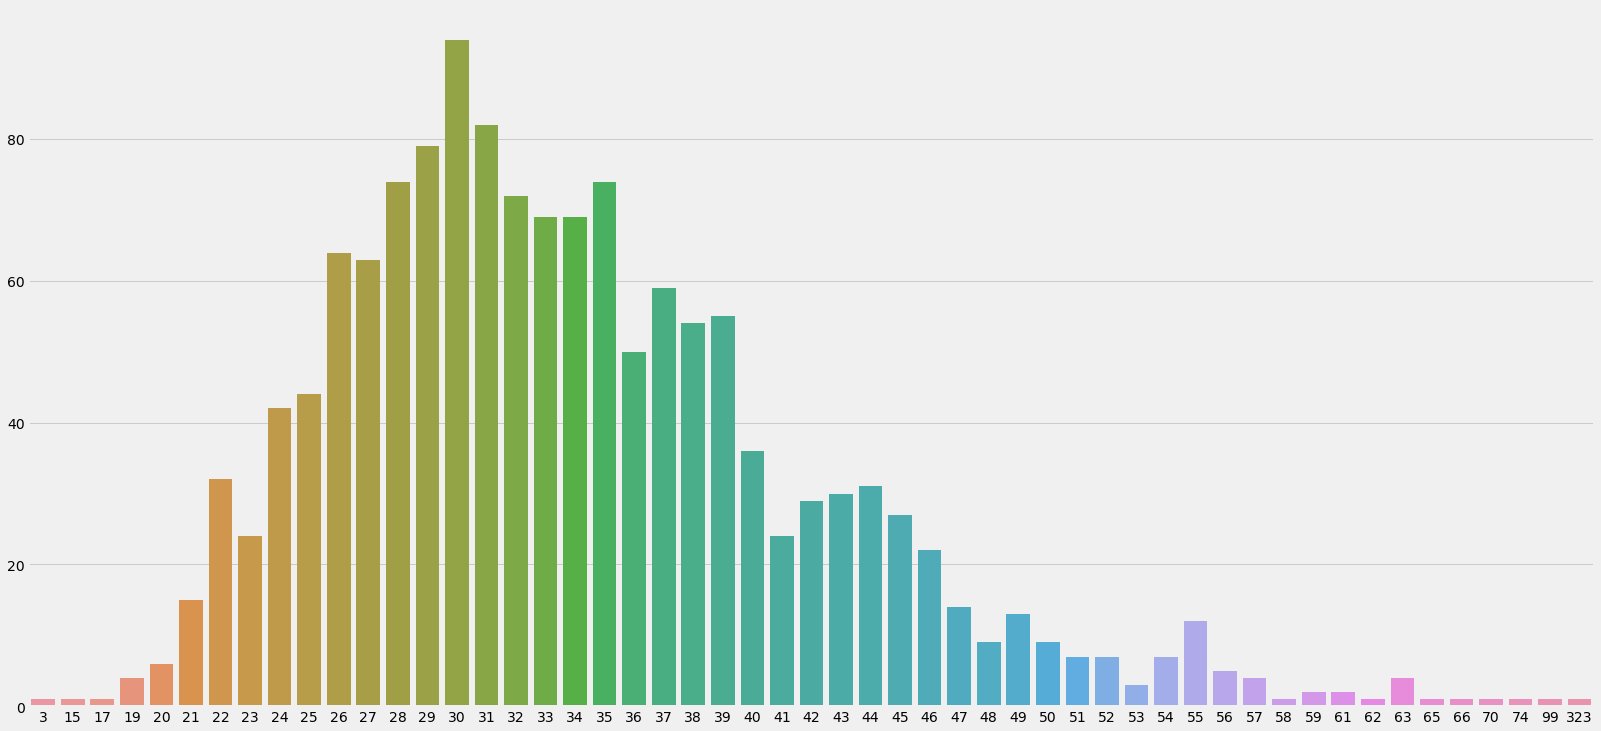

In [32]:
plt.figure(figsize = (25,12))
se.barplot(data['age'].value_counts().index, data['age'].value_counts().values)

<h4>its look like there are some weired age are present like 3,15,17,323,99 we need to replace by 30 because youngest joing age is 18 and retirement age is 65</h4>

In [33]:
data.loc[(data['age'] > 65), 'age'] = 30
data.loc[(data['age'] < 18), 'age'] = 30

<h4>its look like we did modification lets visualize it</h4>

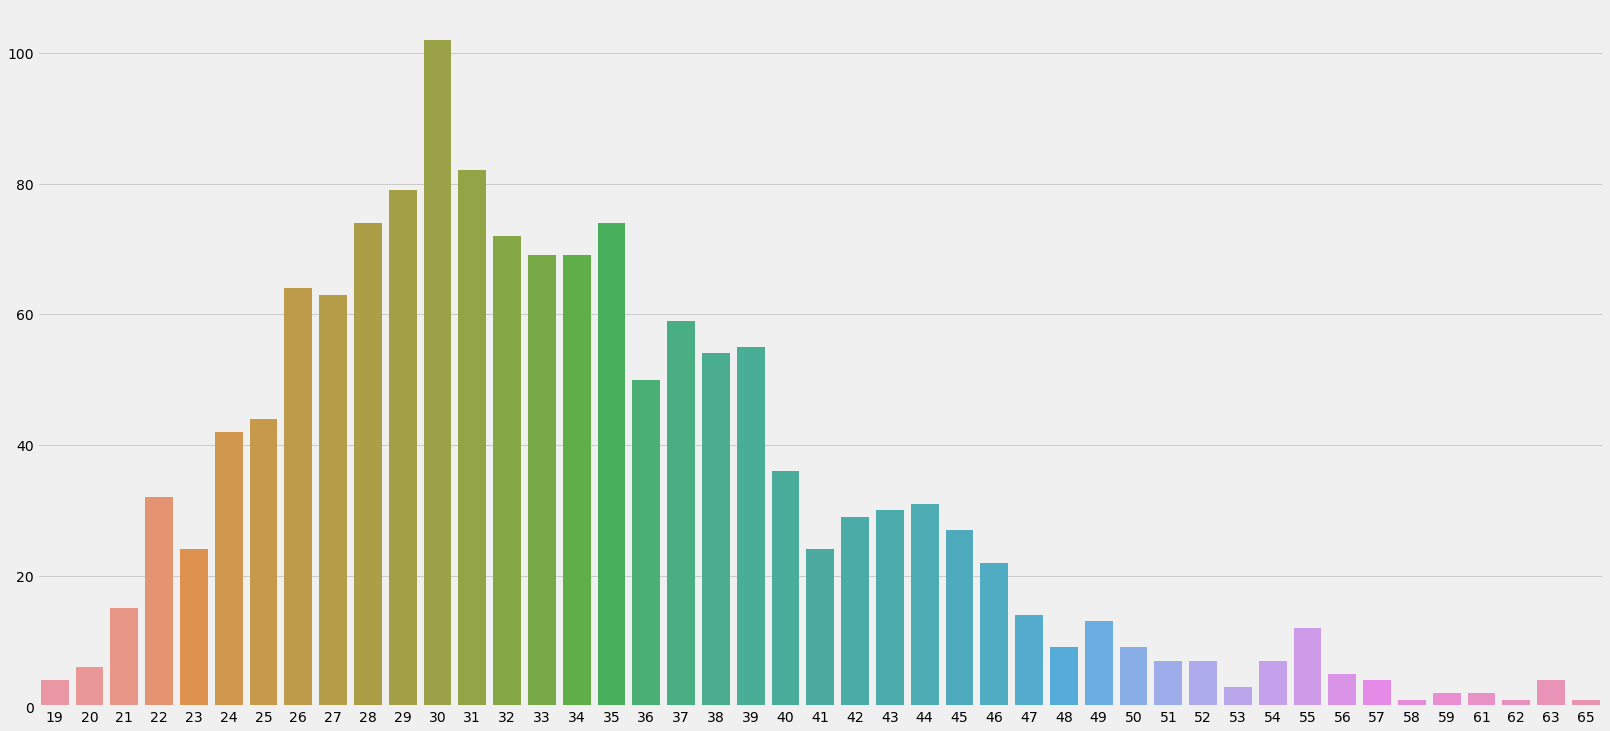

In [34]:
plt.figure(figsize = (25,12))
se.barplot(data['age'].value_counts().index, data['age'].value_counts().values)

<font color = 'orange'><h3>On country_live</h3></font>

In [35]:
data['country_live'].fillna('United States of America',inplace = True)

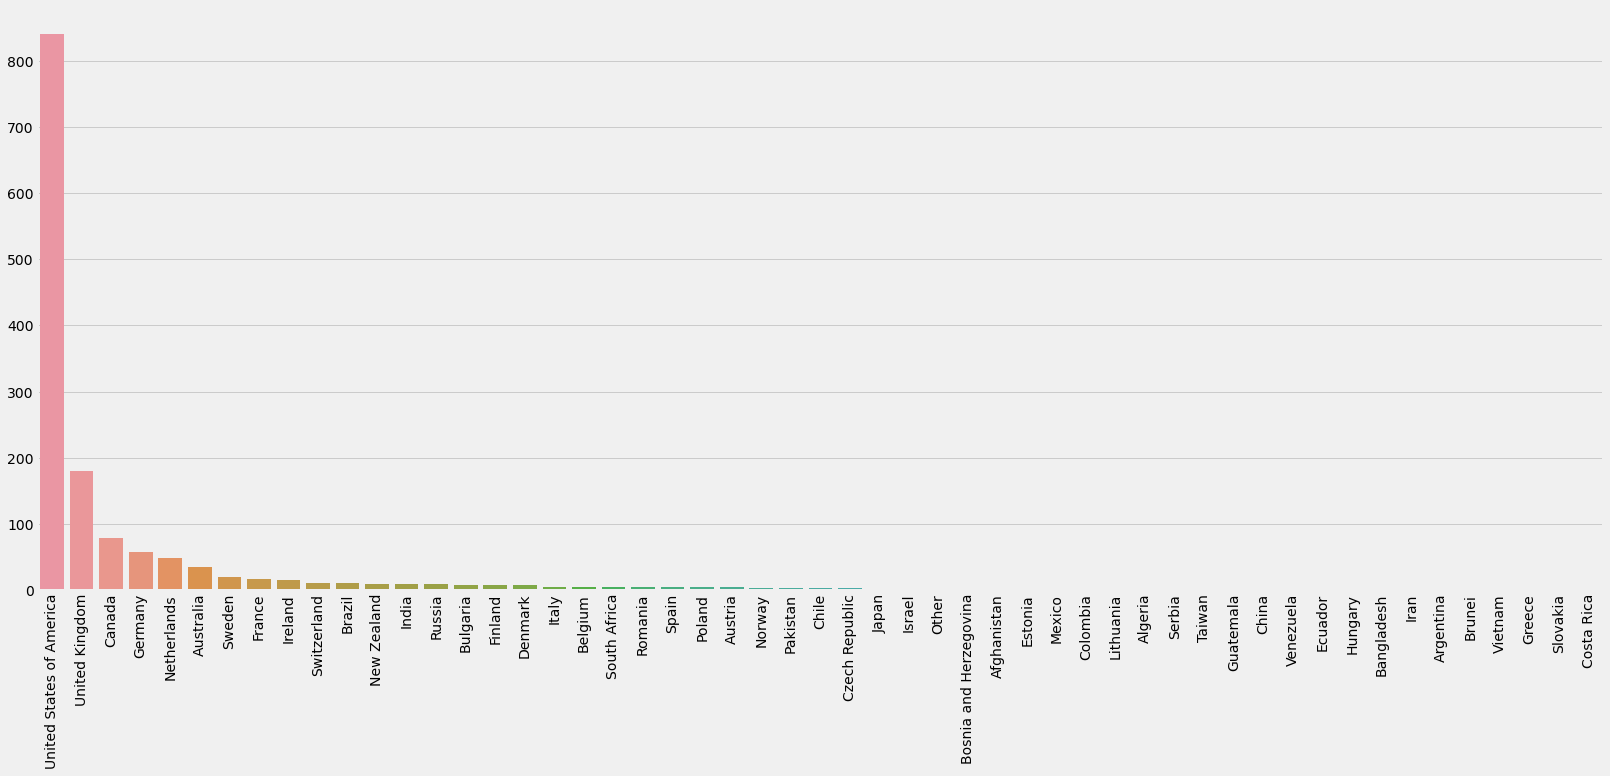

In [36]:
plt.figure(figsize = (25,10))
plt.xticks(rotation = 90)
se.barplot(data['country_live'].value_counts().index, data['country_live'].value_counts().values)

<h4>its seems like only United States of America, United Kingdom,Canada, Germany, Netherlands, Australia has significant frequency in which USA has max value lets replace other by USA</h4>

In [37]:
def apply_country_live(x):
    if x in ['United States of America', 'United Kingdom','Canada', 'Germany', 'Netherlands', 'Australia']:
        return x
    else:
        return 'United States of America'

In [38]:
data['country_live'] = data.country_live.apply(apply_country_live)

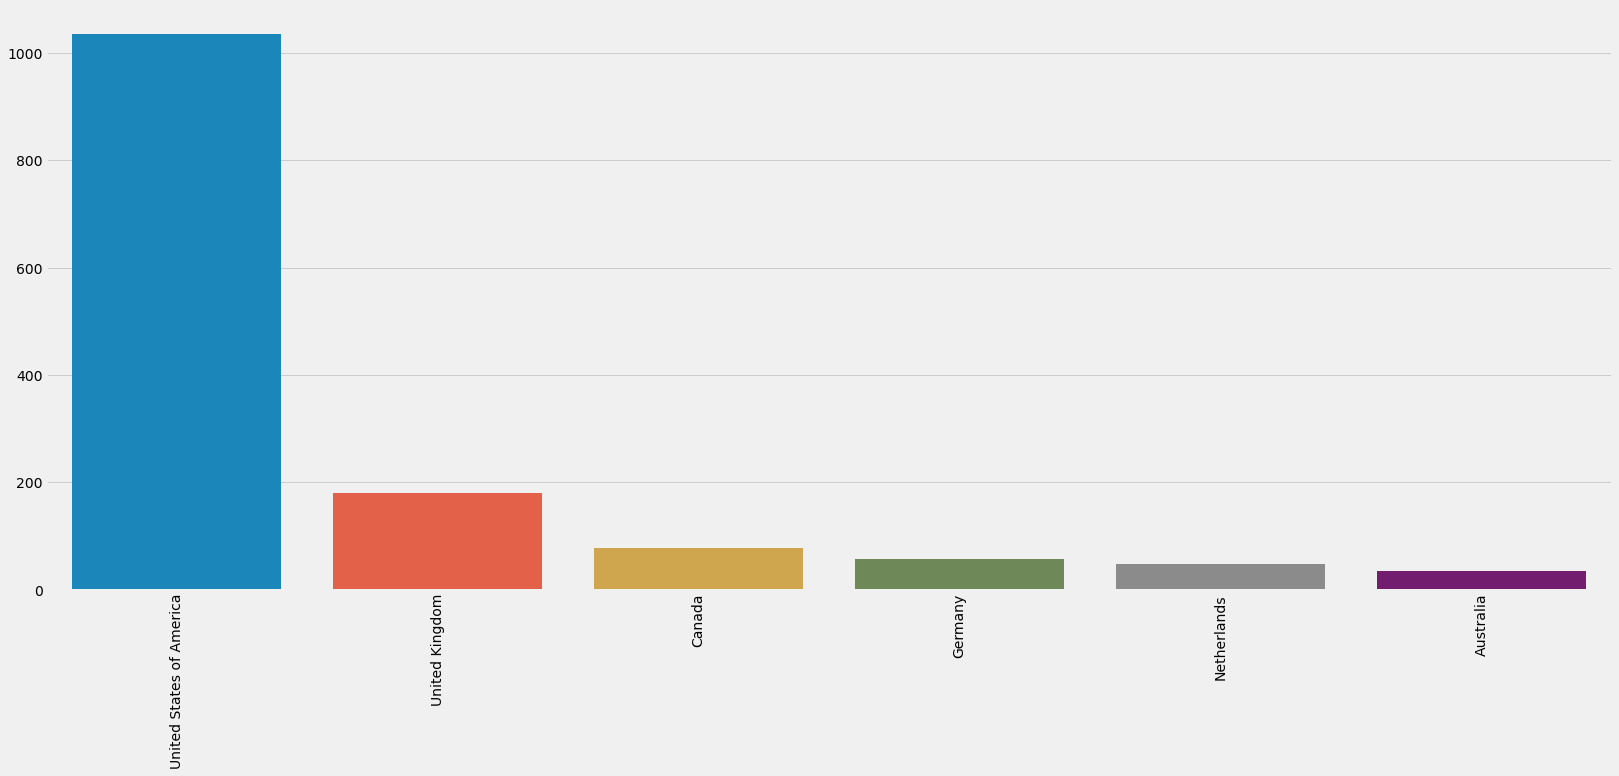

In [39]:
plt.figure(figsize = (25,10))
plt.xticks(rotation = 90)
se.barplot(data['country_live'].value_counts().index, data['country_live'].value_counts().values)

<h4>its look like we got our country_live</h4>

<font color = 'orange'><h3>lets do same thing to country_work column</h3></font>

In [40]:
data['country_work'] = data.country_work.apply(apply_country_live)

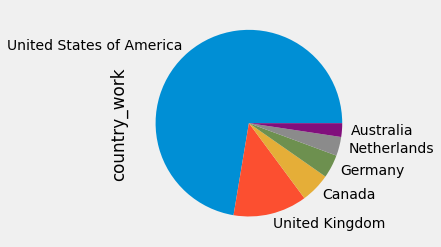

In [41]:
data['country_work'].value_counts().plot.pie()

<h4>its look like we got our country_work</h4>

In [42]:
data.head(5)

,self_empl_flag,comp_no_empl,tech_comp_flag,mh_coverage_flag,mh_employer_discussion,mh_resources_provided,mh_anonimity_flag,mh_medical_leave,mh_discussion_neg_impact,ph_discussion_neg_impact,...,mh_diagnos_proffesional,mh_sought_proffes_treatm,mh_eff_treat_impact_on_work,mh_not_eff_treat_impact_on_work,age,sex,country_live,country_work,work_position,remote_flag
0,0,100.0,1.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,...,1,0,4,4,39,1.0,United Kingdom,United Kingdom,Back-end Developer,3
1,0,25.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,...,1,1,0,3,29,1.0,United States of America,United States of America,Back-end Developer|Front-end Developer,0
2,0,25.0,1.0,0.0,0.0,0.0,2.0,2.0,2.0,0.0,...,0,1,4,4,38,1.0,United Kingdom,United Kingdom,Back-end Developer,1
3,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1,1,3,3,43,1.0,United Kingdom,United Kingdom,Supervisor/Team Lead,3
4,0,25.0,0.0,1.0,0.0,0.0,0.0,2.0,1.0,2.0,...,1,1,3,3,43,0.0,United States of America,United States of America,Executive Leadership|Supervisor/Team Lead|Dev ...,3


In [43]:
unique_object_values_in_columns(data)

country_live : ['United Kingdom' 'United States of America' 'Canada' 'Germany'
 'Netherlands' 'Australia']
country_work : ['United Kingdom' 'United States of America' 'Canada' 'Germany'
 'Netherlands' 'Australia']
work_position : ['Back-end Developer' 'Back-end Developer|Front-end Developer'
 'Supervisor/Team Lead'
 'Executive Leadership|Supervisor/Team Lead|Dev Evangelist/Advocate|DevOps/SysAdmin|Support|Back-end Developer|Front-end Developer'
 'DevOps/SysAdmin|Support|Back-end Developer|Front-end Developer|Designer'
 'Dev Evangelist/Advocate|Back-end Developer'
 'Support|Back-end Developer|One-person shop'
 'One-person shop|Front-end Developer|Back-end Developer'
 'Front-end Developer' 'Executive Leadership'
 'Supervisor/Team Lead|Dev Evangelist/Advocate|Back-end Developer|Front-end Developer'
 'DevOps/SysAdmin|Back-end Developer|Front-end Developer' 'Designer'
 'Other|Executive Leadership' 'One-person shop' 'Other'
 'Supervisor/Team Lead|Support|Back-end Developer'
 'Supervisor/Team

In [44]:
data.head(5)

,self_empl_flag,comp_no_empl,tech_comp_flag,mh_coverage_flag,mh_employer_discussion,mh_resources_provided,mh_anonimity_flag,mh_medical_leave,mh_discussion_neg_impact,ph_discussion_neg_impact,...,mh_diagnos_proffesional,mh_sought_proffes_treatm,mh_eff_treat_impact_on_work,mh_not_eff_treat_impact_on_work,age,sex,country_live,country_work,work_position,remote_flag
0,0,100.0,1.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,...,1,0,4,4,39,1.0,United Kingdom,United Kingdom,Back-end Developer,3
1,0,25.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,...,1,1,0,3,29,1.0,United States of America,United States of America,Back-end Developer|Front-end Developer,0
2,0,25.0,1.0,0.0,0.0,0.0,2.0,2.0,2.0,0.0,...,0,1,4,4,38,1.0,United Kingdom,United Kingdom,Back-end Developer,1
3,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1,1,3,3,43,1.0,United Kingdom,United Kingdom,Supervisor/Team Lead,3
4,0,25.0,0.0,1.0,0.0,0.0,0.0,2.0,1.0,2.0,...,1,1,3,3,43,0.0,United States of America,United States of America,Executive Leadership|Supervisor/Team Lead|Dev ...,3


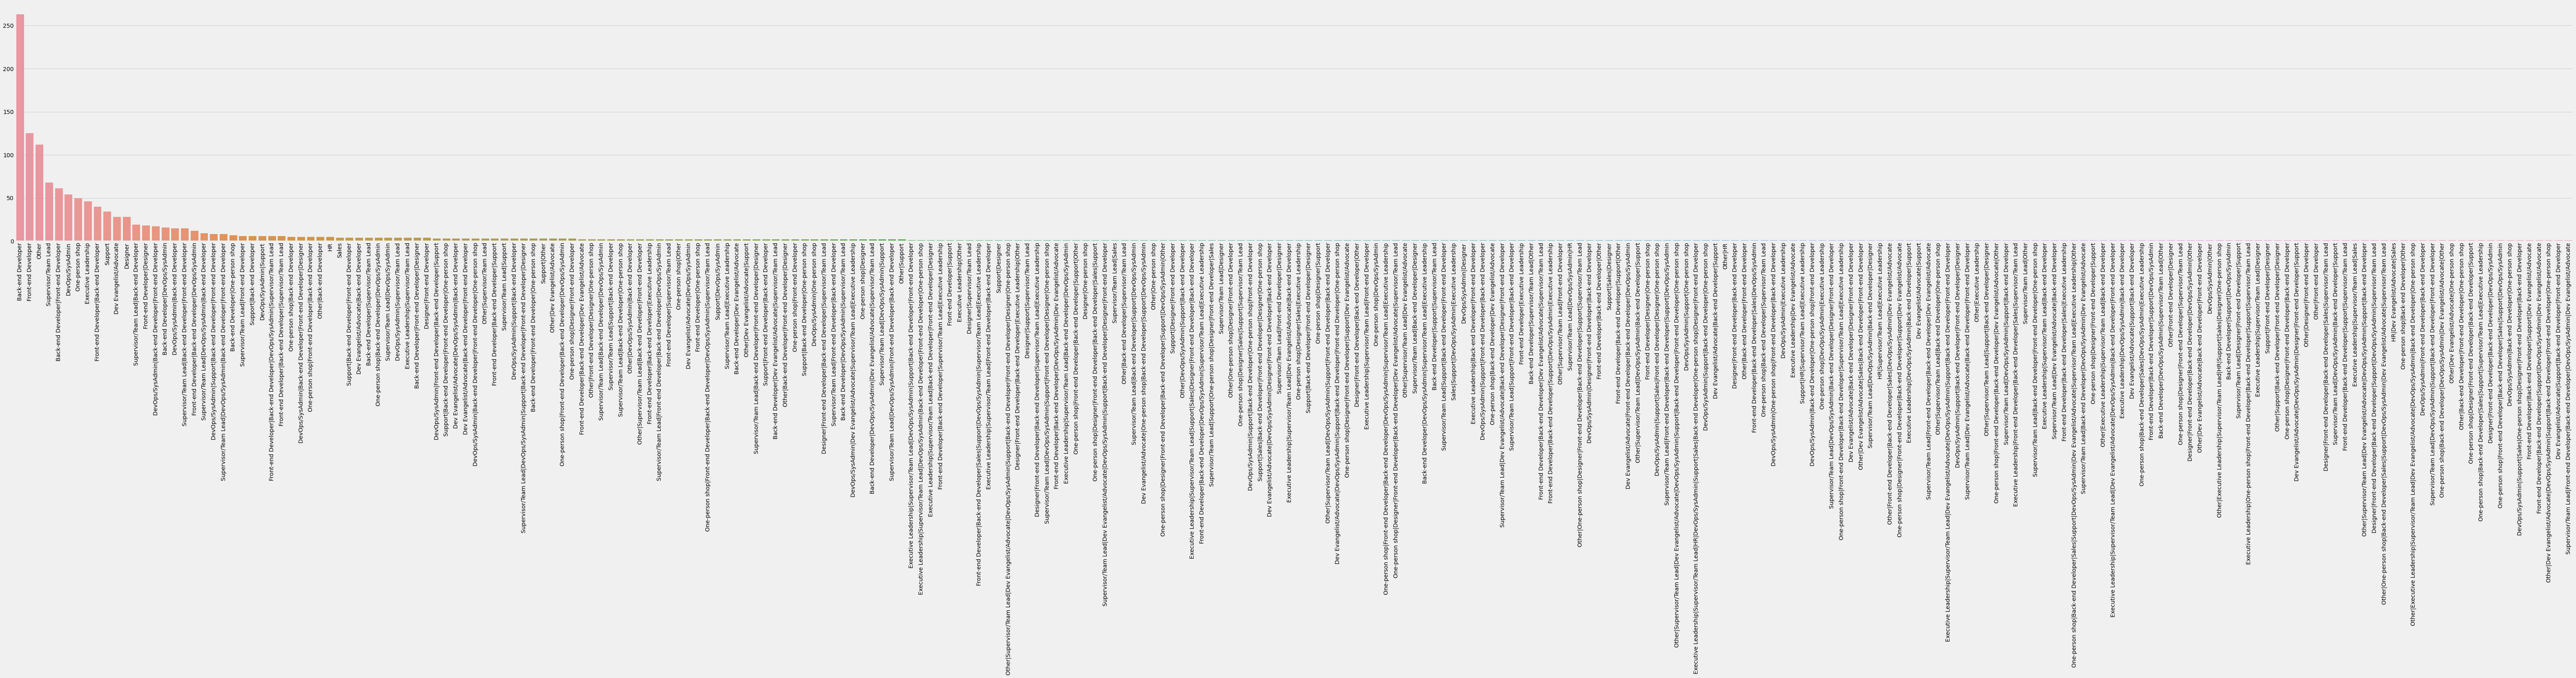

In [45]:
plt.figure(figsize = (100,10))
plt.xticks(rotation = 90)
se.barplot(data['work_position'].value_counts().index, data['work_position'].value_counts().values)

In [46]:
data.to_csv("03.Cleaned Mental Health.csv")

In [2]:
%history -g -f 02.Libraries, Preview, Cleaning of Mental health Dataset.ipynb